<a href="https://colab.research.google.com/github/lawoh/Niger_climate/blob/master/Niger_climat_dataViz_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisation des données Climatiques du Niger 2020
  ###### Auteur : Laouali ADA AYA (Géomaticien/Geospatial Data Analyst/GIS)Developper

Connexion à google drive
Décommenter cette le code ci-dessous si vous voulez acceder à votre google drive

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


### Installations des librairies nécéssaires au fonctionnement de l'application

In [2]:
!pip install pandas

In [3]:
! pip install geopandas

In [4]:
!pip install folium

In [5]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 51.7 MB/s eta 0:00:00


### Import des librairies nécéssaires pour lancer le code


In [6]:
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
import plotly.express as px

### Connexion au drive


In [7]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import des données

In [8]:
niger_climate_data = pd.read_csv('https://raw.githubusercontent.com/lawoh/Niger_climate/master/donnees_climat.csv')
niger_climate_data

,Country,Region,Longitude,Latitude,Attitude/Elevation,Local time,Annual high temperature,Annual low temperature,Average annual precip.,Warmest month,Coldest Month,Wettest Month,Driest Month,Number of days with rainfall (≥ 1.0 mm),Days with no rain,Humidity
0,Niger,Agadez,7.986535,16.974169,503.57m (1652.13ft),Saturday 15:27,35.98ºC (96.76ºF),24.46ºC (76.03ºF),15.43mm (0.61in),May (41.35ºC / 106.43ºF),January (14.6ºC / 58.28ºF),August (74.98mm / 2.95in),January (0.0mm / 0in),26.1 days (7.15%),338.9 days (92.85%),17.93%
1,Niger,Diffa,12.615880,13.313247,307.83m (1009.94ft),Saturday 15:27,36.83ºC (98.29ºF),25.93ºC (78.67ºF),22.32mm (0.88in),May (42.23ºC / 108.01ºF),January (18.33ºC / 64.99ºF),August (144.66mm / 5.7in),January (0.0mm / 0in),40.62 days (11.13%),324.38 days (88.87%),26.0%
2,Niger,Dosso,3.208099,13.050483,238.11m (781.2ft),Saturday 11:33,37.26ºC (99.07ºF),24.09ºC (75.36ºF),38.62mm (1.52in),April (42.32ºC / 108.18ºF),January (17.43ºC / 63.37ºF),August (172.28mm / 6.78in),January (0.0mm / 0in),56.28 days (15.42%),308.72 days (84.58%),32.89%
3,Niger,Maradi,7.103640,13.500978,361.33m (1185.47ft),Saturday 15:27,36.66ºC (97.99ºF),23.49ºC (74.28ºF),43.04mm (1.69in),April (41.93ºC / 107.47ºF),January (15.13ºC / 59.23ºF),August (227.09mm / 8.94in),January (0.0mm / 0in),47.62 days (13.05%),317.38 days (86.95%),28.14%
4,Niger,Tahoua,5.257997,14.890458,388.55m (1274.77ft),Saturday 15:27,36.64ºC (97.95ºF),25.01ºC (77.02ºF),29.37mm (1.16in),May (41.32ºC / 106.38ºF),January (16.41ºC / 61.54ºF),August (150.07mm / 5.91in),January (0.0mm / 0in),43.74 days (11.98%),321.26 days (88.02%),23.42%
5,Niger,Tillabéry,2.145024,14.648953,283.09m (928.77ft),Saturday 15:27,37.54ºC (99.57ºF),25.83ºC (78.49ºF),20.55mm (0.81in),May (41.77ºC / 107.19ºF),January (17.62ºC / 63.72ºF),August (107.18mm / 4.22in),December (0.01mm / 0.0in),32.81 days (8.99%),332.19 days (91.01%),24.17%
6,Niger,Zinder,8.985270,13.801812,470.16m (1542.52ft),Saturday 15:27,36.38ºC (97.48ºF),23.7ºC (74.66ºF),34.21mm (1.35in),May (41.2ºC / 106.16ºF),January (14.51ºC / 58.12ºF),August (208.84mm / 8.22in),November (0.0mm / 0in),41.72 days (11.43%),323.28 days (88.57%),24.05%
7,Niger,Niamey,2.125385,13.511596,221.79m (727.66ft),Saturday 15:27,37.54ºC (99.57ºF),25.18ºC (77.32ºF),19.31mm (0.76in),April (42.11ºC / 107.8ºF),January (17.49ºC / 63.48ºF),August (79.91mm / 3.15in),January (0.0mm / 0in),32.37 days (8.87%),332.63 days (91.13%),27.28%


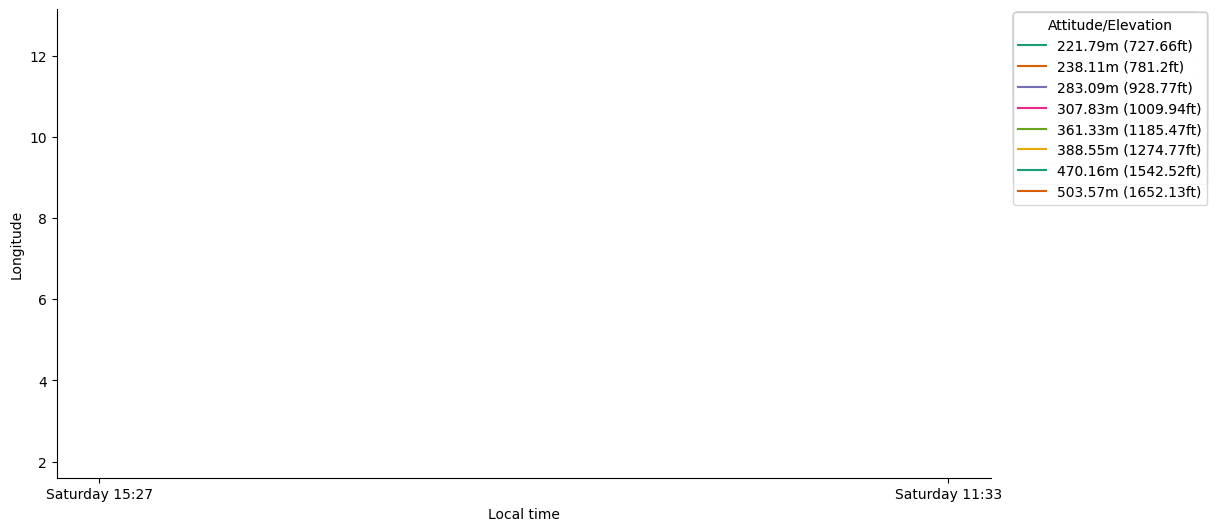

In [9]:
# @title Local time vs Longitude

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Local time']
  ys = series['Longitude']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = niger_climate_data.sort_values('Local time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Attitude/Elevation')):
  _plot_series(series, series_name, i)
  fig.legend(title='Attitude/Elevation', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Local time')
_ = plt.ylabel('Longitude')

In [10]:
 niger_climate_data['Attitude/Elevation'] = niger_climate_data['Attitude/Elevation'].str.split('m').str[0]
 niger_climate_data['Attitude/Elevation'] = pd.to_numeric(niger_climate_data['Attitude/Elevation'])
 niger_climate_data

,Country,Region,Longitude,Latitude,Attitude/Elevation,Local time,Annual high temperature,Annual low temperature,Average annual precip.,Warmest month,Coldest Month,Wettest Month,Driest Month,Number of days with rainfall (≥ 1.0 mm),Days with no rain,Humidity
0,Niger,Agadez,7.986535,16.974169,503.57,Saturday 15:27,35.98ºC (96.76ºF),24.46ºC (76.03ºF),15.43mm (0.61in),May (41.35ºC / 106.43ºF),January (14.6ºC / 58.28ºF),August (74.98mm / 2.95in),January (0.0mm / 0in),26.1 days (7.15%),338.9 days (92.85%),17.93%
1,Niger,Diffa,12.615880,13.313247,307.83,Saturday 15:27,36.83ºC (98.29ºF),25.93ºC (78.67ºF),22.32mm (0.88in),May (42.23ºC / 108.01ºF),January (18.33ºC / 64.99ºF),August (144.66mm / 5.7in),January (0.0mm / 0in),40.62 days (11.13%),324.38 days (88.87%),26.0%
2,Niger,Dosso,3.208099,13.050483,238.11,Saturday 11:33,37.26ºC (99.07ºF),24.09ºC (75.36ºF),38.62mm (1.52in),April (42.32ºC / 108.18ºF),January (17.43ºC / 63.37ºF),August (172.28mm / 6.78in),January (0.0mm / 0in),56.28 days (15.42%),308.72 days (84.58%),32.89%
3,Niger,Maradi,7.103640,13.500978,361.33,Saturday 15:27,36.66ºC (97.99ºF),23.49ºC (74.28ºF),43.04mm (1.69in),April (41.93ºC / 107.47ºF),January (15.13ºC / 59.23ºF),August (227.09mm / 8.94in),January (0.0mm / 0in),47.62 days (13.05%),317.38 days (86.95%),28.14%
4,Niger,Tahoua,5.257997,14.890458,388.55,Saturday 15:27,36.64ºC (97.95ºF),25.01ºC (77.02ºF),29.37mm (1.16in),May (41.32ºC / 106.38ºF),January (16.41ºC / 61.54ºF),August (150.07mm / 5.91in),January (0.0mm / 0in),43.74 days (11.98%),321.26 days (88.02%),23.42%
5,Niger,Tillabéry,2.145024,14.648953,283.09,Saturday 15:27,37.54ºC (99.57ºF),25.83ºC (78.49ºF),20.55mm (0.81in),May (41.77ºC / 107.19ºF),January (17.62ºC / 63.72ºF),August (107.18mm / 4.22in),December (0.01mm / 0.0in),32.81 days (8.99%),332.19 days (91.01%),24.17%
6,Niger,Zinder,8.985270,13.801812,470.16,Saturday 15:27,36.38ºC (97.48ºF),23.7ºC (74.66ºF),34.21mm (1.35in),May (41.2ºC / 106.16ºF),January (14.51ºC / 58.12ºF),August (208.84mm / 8.22in),November (0.0mm / 0in),41.72 days (11.43%),323.28 days (88.57%),24.05%
7,Niger,Niamey,2.125385,13.511596,221.79,Saturday 15:27,37.54ºC (99.57ºF),25.18ºC (77.32ºF),19.31mm (0.76in),April (42.11ºC / 107.8ºF),January (17.49ºC / 63.48ºF),August (79.91mm / 3.15in),January (0.0mm / 0in),32.37 days (8.87%),332.63 days (91.13%),27.28%


In [11]:
niger_climate_data['Annual high temperature'] = niger_climate_data['Annual high temperature'].str.split('º').str[0]
niger_climate_data['Annual high temperature'] = pd.to_numeric(niger_climate_data['Annual high temperature'])
niger_climate_data

,Country,Region,Longitude,Latitude,Attitude/Elevation,Local time,Annual high temperature,Annual low temperature,Average annual precip.,Warmest month,Coldest Month,Wettest Month,Driest Month,Number of days with rainfall (≥ 1.0 mm),Days with no rain,Humidity
0,Niger,Agadez,7.986535,16.974169,503.57,Saturday 15:27,35.98,24.46ºC (76.03ºF),15.43mm (0.61in),May (41.35ºC / 106.43ºF),January (14.6ºC / 58.28ºF),August (74.98mm / 2.95in),January (0.0mm / 0in),26.1 days (7.15%),338.9 days (92.85%),17.93%
1,Niger,Diffa,12.615880,13.313247,307.83,Saturday 15:27,36.83,25.93ºC (78.67ºF),22.32mm (0.88in),May (42.23ºC / 108.01ºF),January (18.33ºC / 64.99ºF),August (144.66mm / 5.7in),January (0.0mm / 0in),40.62 days (11.13%),324.38 days (88.87%),26.0%
2,Niger,Dosso,3.208099,13.050483,238.11,Saturday 11:33,37.26,24.09ºC (75.36ºF),38.62mm (1.52in),April (42.32ºC / 108.18ºF),January (17.43ºC / 63.37ºF),August (172.28mm / 6.78in),January (0.0mm / 0in),56.28 days (15.42%),308.72 days (84.58%),32.89%
3,Niger,Maradi,7.103640,13.500978,361.33,Saturday 15:27,36.66,23.49ºC (74.28ºF),43.04mm (1.69in),April (41.93ºC / 107.47ºF),January (15.13ºC / 59.23ºF),August (227.09mm / 8.94in),January (0.0mm / 0in),47.62 days (13.05%),317.38 days (86.95%),28.14%
4,Niger,Tahoua,5.257997,14.890458,388.55,Saturday 15:27,36.64,25.01ºC (77.02ºF),29.37mm (1.16in),May (41.32ºC / 106.38ºF),January (16.41ºC / 61.54ºF),August (150.07mm / 5.91in),January (0.0mm / 0in),43.74 days (11.98%),321.26 days (88.02%),23.42%
5,Niger,Tillabéry,2.145024,14.648953,283.09,Saturday 15:27,37.54,25.83ºC (78.49ºF),20.55mm (0.81in),May (41.77ºC / 107.19ºF),January (17.62ºC / 63.72ºF),August (107.18mm / 4.22in),December (0.01mm / 0.0in),32.81 days (8.99%),332.19 days (91.01%),24.17%
6,Niger,Zinder,8.985270,13.801812,470.16,Saturday 15:27,36.38,23.7ºC (74.66ºF),34.21mm (1.35in),May (41.2ºC / 106.16ºF),January (14.51ºC / 58.12ºF),August (208.84mm / 8.22in),November (0.0mm / 0in),41.72 days (11.43%),323.28 days (88.57%),24.05%
7,Niger,Niamey,2.125385,13.511596,221.79,Saturday 15:27,37.54,25.18ºC (77.32ºF),19.31mm (0.76in),April (42.11ºC / 107.8ºF),January (17.49ºC / 63.48ºF),August (79.91mm / 3.15in),January (0.0mm / 0in),32.37 days (8.87%),332.63 days (91.13%),27.28%


In [12]:
niger_climate_data = niger_climate_data.drop('Local time',axis=1)
niger_climate_data

,Country,Region,Longitude,Latitude,Attitude/Elevation,Annual high temperature,Annual low temperature,Average annual precip.,Warmest month,Coldest Month,Wettest Month,Driest Month,Number of days with rainfall (≥ 1.0 mm),Days with no rain,Humidity
0,Niger,Agadez,7.986535,16.974169,503.57,35.98,24.46ºC (76.03ºF),15.43mm (0.61in),May (41.35ºC / 106.43ºF),January (14.6ºC / 58.28ºF),August (74.98mm / 2.95in),January (0.0mm / 0in),26.1 days (7.15%),338.9 days (92.85%),17.93%
1,Niger,Diffa,12.615880,13.313247,307.83,36.83,25.93ºC (78.67ºF),22.32mm (0.88in),May (42.23ºC / 108.01ºF),January (18.33ºC / 64.99ºF),August (144.66mm / 5.7in),January (0.0mm / 0in),40.62 days (11.13%),324.38 days (88.87%),26.0%
2,Niger,Dosso,3.208099,13.050483,238.11,37.26,24.09ºC (75.36ºF),38.62mm (1.52in),April (42.32ºC / 108.18ºF),January (17.43ºC / 63.37ºF),August (172.28mm / 6.78in),January (0.0mm / 0in),56.28 days (15.42%),308.72 days (84.58%),32.89%
3,Niger,Maradi,7.103640,13.500978,361.33,36.66,23.49ºC (74.28ºF),43.04mm (1.69in),April (41.93ºC / 107.47ºF),January (15.13ºC / 59.23ºF),August (227.09mm / 8.94in),January (0.0mm / 0in),47.62 days (13.05%),317.38 days (86.95%),28.14%
4,Niger,Tahoua,5.257997,14.890458,388.55,36.64,25.01ºC (77.02ºF),29.37mm (1.16in),May (41.32ºC / 106.38ºF),January (16.41ºC / 61.54ºF),August (150.07mm / 5.91in),January (0.0mm / 0in),43.74 days (11.98%),321.26 days (88.02%),23.42%
5,Niger,Tillabéry,2.145024,14.648953,283.09,37.54,25.83ºC (78.49ºF),20.55mm (0.81in),May (41.77ºC / 107.19ºF),January (17.62ºC / 63.72ºF),August (107.18mm / 4.22in),December (0.01mm / 0.0in),32.81 days (8.99%),332.19 days (91.01%),24.17%
6,Niger,Zinder,8.985270,13.801812,470.16,36.38,23.7ºC (74.66ºF),34.21mm (1.35in),May (41.2ºC / 106.16ºF),January (14.51ºC / 58.12ºF),August (208.84mm / 8.22in),November (0.0mm / 0in),41.72 days (11.43%),323.28 days (88.57%),24.05%
7,Niger,Niamey,2.125385,13.511596,221.79,37.54,25.18ºC (77.32ºF),19.31mm (0.76in),April (42.11ºC / 107.8ºF),January (17.49ºC / 63.48ºF),August (79.91mm / 3.15in),January (0.0mm / 0in),32.37 days (8.87%),332.63 days (91.13%),27.28%


In [13]:
niger_climate_data['Annual low temperature'] = niger_climate_data['Annual low temperature'].str.split('º').str[0]
niger_climate_data['Annual low temperature'] = pd.to_numeric(niger_climate_data['Annual low temperature'])
niger_climate_data

,Country,Region,Longitude,Latitude,Attitude/Elevation,Annual high temperature,Annual low temperature,Average annual precip.,Warmest month,Coldest Month,Wettest Month,Driest Month,Number of days with rainfall (≥ 1.0 mm),Days with no rain,Humidity
0,Niger,Agadez,7.986535,16.974169,503.57,35.98,24.46,15.43mm (0.61in),May (41.35ºC / 106.43ºF),January (14.6ºC / 58.28ºF),August (74.98mm / 2.95in),January (0.0mm / 0in),26.1 days (7.15%),338.9 days (92.85%),17.93%
1,Niger,Diffa,12.615880,13.313247,307.83,36.83,25.93,22.32mm (0.88in),May (42.23ºC / 108.01ºF),January (18.33ºC / 64.99ºF),August (144.66mm / 5.7in),January (0.0mm / 0in),40.62 days (11.13%),324.38 days (88.87%),26.0%
2,Niger,Dosso,3.208099,13.050483,238.11,37.26,24.09,38.62mm (1.52in),April (42.32ºC / 108.18ºF),January (17.43ºC / 63.37ºF),August (172.28mm / 6.78in),January (0.0mm / 0in),56.28 days (15.42%),308.72 days (84.58%),32.89%
3,Niger,Maradi,7.103640,13.500978,361.33,36.66,23.49,43.04mm (1.69in),April (41.93ºC / 107.47ºF),January (15.13ºC / 59.23ºF),August (227.09mm / 8.94in),January (0.0mm / 0in),47.62 days (13.05%),317.38 days (86.95%),28.14%
4,Niger,Tahoua,5.257997,14.890458,388.55,36.64,25.01,29.37mm (1.16in),May (41.32ºC / 106.38ºF),January (16.41ºC / 61.54ºF),August (150.07mm / 5.91in),January (0.0mm / 0in),43.74 days (11.98%),321.26 days (88.02%),23.42%
5,Niger,Tillabéry,2.145024,14.648953,283.09,37.54,25.83,20.55mm (0.81in),May (41.77ºC / 107.19ºF),January (17.62ºC / 63.72ºF),August (107.18mm / 4.22in),December (0.01mm / 0.0in),32.81 days (8.99%),332.19 days (91.01%),24.17%
6,Niger,Zinder,8.985270,13.801812,470.16,36.38,23.70,34.21mm (1.35in),May (41.2ºC / 106.16ºF),January (14.51ºC / 58.12ºF),August (208.84mm / 8.22in),November (0.0mm / 0in),41.72 days (11.43%),323.28 days (88.57%),24.05%
7,Niger,Niamey,2.125385,13.511596,221.79,37.54,25.18,19.31mm (0.76in),April (42.11ºC / 107.8ºF),January (17.49ºC / 63.48ºF),August (79.91mm / 3.15in),January (0.0mm / 0in),32.37 days (8.87%),332.63 days (91.13%),27.28%


In [14]:
niger_climate_data['Average annual precip.'] = niger_climate_data['Average annual precip.'].str.split('m').str[0]
niger_climate_data['Average annual precip.'] = pd.to_numeric(niger_climate_data['Average annual precip.'])
niger_climate_data

,Country,Region,Longitude,Latitude,Attitude/Elevation,Annual high temperature,Annual low temperature,Average annual precip.,Warmest month,Coldest Month,Wettest Month,Driest Month,Number of days with rainfall (≥ 1.0 mm),Days with no rain,Humidity
0,Niger,Agadez,7.986535,16.974169,503.57,35.98,24.46,15.43,May (41.35ºC / 106.43ºF),January (14.6ºC / 58.28ºF),August (74.98mm / 2.95in),January (0.0mm / 0in),26.1 days (7.15%),338.9 days (92.85%),17.93%
1,Niger,Diffa,12.615880,13.313247,307.83,36.83,25.93,22.32,May (42.23ºC / 108.01ºF),January (18.33ºC / 64.99ºF),August (144.66mm / 5.7in),January (0.0mm / 0in),40.62 days (11.13%),324.38 days (88.87%),26.0%
2,Niger,Dosso,3.208099,13.050483,238.11,37.26,24.09,38.62,April (42.32ºC / 108.18ºF),January (17.43ºC / 63.37ºF),August (172.28mm / 6.78in),January (0.0mm / 0in),56.28 days (15.42%),308.72 days (84.58%),32.89%
3,Niger,Maradi,7.103640,13.500978,361.33,36.66,23.49,43.04,April (41.93ºC / 107.47ºF),January (15.13ºC / 59.23ºF),August (227.09mm / 8.94in),January (0.0mm / 0in),47.62 days (13.05%),317.38 days (86.95%),28.14%
4,Niger,Tahoua,5.257997,14.890458,388.55,36.64,25.01,29.37,May (41.32ºC / 106.38ºF),January (16.41ºC / 61.54ºF),August (150.07mm / 5.91in),January (0.0mm / 0in),43.74 days (11.98%),321.26 days (88.02%),23.42%
5,Niger,Tillabéry,2.145024,14.648953,283.09,37.54,25.83,20.55,May (41.77ºC / 107.19ºF),January (17.62ºC / 63.72ºF),August (107.18mm / 4.22in),December (0.01mm / 0.0in),32.81 days (8.99%),332.19 days (91.01%),24.17%
6,Niger,Zinder,8.985270,13.801812,470.16,36.38,23.70,34.21,May (41.2ºC / 106.16ºF),January (14.51ºC / 58.12ºF),August (208.84mm / 8.22in),November (0.0mm / 0in),41.72 days (11.43%),323.28 days (88.57%),24.05%
7,Niger,Niamey,2.125385,13.511596,221.79,37.54,25.18,19.31,April (42.11ºC / 107.8ºF),January (17.49ºC / 63.48ºF),August (79.91mm / 3.15in),January (0.0mm / 0in),32.37 days (8.87%),332.63 days (91.13%),27.28%


In [15]:
niger_climate_data['Number of days with rainfall (≥ 1.0 mm)'] = niger_climate_data['Number of days with rainfall (≥ 1.0 mm)'].str.split(' ').str[0]
niger_climate_data['Number of days with rainfall (≥ 1.0 mm)'] = pd.to_numeric(niger_climate_data['Number of days with rainfall (≥ 1.0 mm)'])
niger_climate_data

,Country,Region,Longitude,Latitude,Attitude/Elevation,Annual high temperature,Annual low temperature,Average annual precip.,Warmest month,Coldest Month,Wettest Month,Driest Month,Number of days with rainfall (≥ 1.0 mm),Days with no rain,Humidity
0,Niger,Agadez,7.986535,16.974169,503.57,35.98,24.46,15.43,May (41.35ºC / 106.43ºF),January (14.6ºC / 58.28ºF),August (74.98mm / 2.95in),January (0.0mm / 0in),26.10,338.9 days (92.85%),17.93%
1,Niger,Diffa,12.615880,13.313247,307.83,36.83,25.93,22.32,May (42.23ºC / 108.01ºF),January (18.33ºC / 64.99ºF),August (144.66mm / 5.7in),January (0.0mm / 0in),40.62,324.38 days (88.87%),26.0%
2,Niger,Dosso,3.208099,13.050483,238.11,37.26,24.09,38.62,April (42.32ºC / 108.18ºF),January (17.43ºC / 63.37ºF),August (172.28mm / 6.78in),January (0.0mm / 0in),56.28,308.72 days (84.58%),32.89%
3,Niger,Maradi,7.103640,13.500978,361.33,36.66,23.49,43.04,April (41.93ºC / 107.47ºF),January (15.13ºC / 59.23ºF),August (227.09mm / 8.94in),January (0.0mm / 0in),47.62,317.38 days (86.95%),28.14%
4,Niger,Tahoua,5.257997,14.890458,388.55,36.64,25.01,29.37,May (41.32ºC / 106.38ºF),January (16.41ºC / 61.54ºF),August (150.07mm / 5.91in),January (0.0mm / 0in),43.74,321.26 days (88.02%),23.42%
5,Niger,Tillabéry,2.145024,14.648953,283.09,37.54,25.83,20.55,May (41.77ºC / 107.19ºF),January (17.62ºC / 63.72ºF),August (107.18mm / 4.22in),December (0.01mm / 0.0in),32.81,332.19 days (91.01%),24.17%
6,Niger,Zinder,8.985270,13.801812,470.16,36.38,23.70,34.21,May (41.2ºC / 106.16ºF),January (14.51ºC / 58.12ºF),August (208.84mm / 8.22in),November (0.0mm / 0in),41.72,323.28 days (88.57%),24.05%
7,Niger,Niamey,2.125385,13.511596,221.79,37.54,25.18,19.31,April (42.11ºC / 107.8ºF),January (17.49ºC / 63.48ºF),August (79.91mm / 3.15in),January (0.0mm / 0in),32.37,332.63 days (91.13%),27.28%


In [16]:
niger_climate_data['Days with no rain'] = niger_climate_data['Days with no rain'].str.split(' ').str[0]
niger_climate_data['Days with no rain'] = pd.to_numeric(niger_climate_data['Days with no rain'])
niger_climate_data

,Country,Region,Longitude,Latitude,Attitude/Elevation,Annual high temperature,Annual low temperature,Average annual precip.,Warmest month,Coldest Month,Wettest Month,Driest Month,Number of days with rainfall (≥ 1.0 mm),Days with no rain,Humidity
0,Niger,Agadez,7.986535,16.974169,503.57,35.98,24.46,15.43,May (41.35ºC / 106.43ºF),January (14.6ºC / 58.28ºF),August (74.98mm / 2.95in),January (0.0mm / 0in),26.10,338.90,17.93%
1,Niger,Diffa,12.615880,13.313247,307.83,36.83,25.93,22.32,May (42.23ºC / 108.01ºF),January (18.33ºC / 64.99ºF),August (144.66mm / 5.7in),January (0.0mm / 0in),40.62,324.38,26.0%
2,Niger,Dosso,3.208099,13.050483,238.11,37.26,24.09,38.62,April (42.32ºC / 108.18ºF),January (17.43ºC / 63.37ºF),August (172.28mm / 6.78in),January (0.0mm / 0in),56.28,308.72,32.89%
3,Niger,Maradi,7.103640,13.500978,361.33,36.66,23.49,43.04,April (41.93ºC / 107.47ºF),January (15.13ºC / 59.23ºF),August (227.09mm / 8.94in),January (0.0mm / 0in),47.62,317.38,28.14%
4,Niger,Tahoua,5.257997,14.890458,388.55,36.64,25.01,29.37,May (41.32ºC / 106.38ºF),January (16.41ºC / 61.54ºF),August (150.07mm / 5.91in),January (0.0mm / 0in),43.74,321.26,23.42%
5,Niger,Tillabéry,2.145024,14.648953,283.09,37.54,25.83,20.55,May (41.77ºC / 107.19ºF),January (17.62ºC / 63.72ºF),August (107.18mm / 4.22in),December (0.01mm / 0.0in),32.81,332.19,24.17%
6,Niger,Zinder,8.985270,13.801812,470.16,36.38,23.70,34.21,May (41.2ºC / 106.16ºF),January (14.51ºC / 58.12ºF),August (208.84mm / 8.22in),November (0.0mm / 0in),41.72,323.28,24.05%
7,Niger,Niamey,2.125385,13.511596,221.79,37.54,25.18,19.31,April (42.11ºC / 107.8ºF),January (17.49ºC / 63.48ºF),August (79.91mm / 3.15in),January (0.0mm / 0in),32.37,332.63,27.28%


In [17]:
niger_climate_data['Humidity'] = niger_climate_data['Humidity'].str.split('%').str[0]
niger_climate_data['Humidity'] = pd.to_numeric(niger_climate_data['Humidity'])
niger_climate_data

,Country,Region,Longitude,Latitude,Attitude/Elevation,Annual high temperature,Annual low temperature,Average annual precip.,Warmest month,Coldest Month,Wettest Month,Driest Month,Number of days with rainfall (≥ 1.0 mm),Days with no rain,Humidity
0,Niger,Agadez,7.986535,16.974169,503.57,35.98,24.46,15.43,May (41.35ºC / 106.43ºF),January (14.6ºC / 58.28ºF),August (74.98mm / 2.95in),January (0.0mm / 0in),26.10,338.90,17.93
1,Niger,Diffa,12.615880,13.313247,307.83,36.83,25.93,22.32,May (42.23ºC / 108.01ºF),January (18.33ºC / 64.99ºF),August (144.66mm / 5.7in),January (0.0mm / 0in),40.62,324.38,26.00
2,Niger,Dosso,3.208099,13.050483,238.11,37.26,24.09,38.62,April (42.32ºC / 108.18ºF),January (17.43ºC / 63.37ºF),August (172.28mm / 6.78in),January (0.0mm / 0in),56.28,308.72,32.89
3,Niger,Maradi,7.103640,13.500978,361.33,36.66,23.49,43.04,April (41.93ºC / 107.47ºF),January (15.13ºC / 59.23ºF),August (227.09mm / 8.94in),January (0.0mm / 0in),47.62,317.38,28.14
4,Niger,Tahoua,5.257997,14.890458,388.55,36.64,25.01,29.37,May (41.32ºC / 106.38ºF),January (16.41ºC / 61.54ºF),August (150.07mm / 5.91in),January (0.0mm / 0in),43.74,321.26,23.42
5,Niger,Tillabéry,2.145024,14.648953,283.09,37.54,25.83,20.55,May (41.77ºC / 107.19ºF),January (17.62ºC / 63.72ºF),August (107.18mm / 4.22in),December (0.01mm / 0.0in),32.81,332.19,24.17
6,Niger,Zinder,8.985270,13.801812,470.16,36.38,23.70,34.21,May (41.2ºC / 106.16ºF),January (14.51ºC / 58.12ºF),August (208.84mm / 8.22in),November (0.0mm / 0in),41.72,323.28,24.05
7,Niger,Niamey,2.125385,13.511596,221.79,37.54,25.18,19.31,April (42.11ºC / 107.8ºF),January (17.49ºC / 63.48ºF),August (79.91mm / 3.15in),January (0.0mm / 0in),32.37,332.63,27.28


In [18]:
niger_climate_data = niger_climate_data.drop('Warmest month',axis=1)
niger_climate_data = niger_climate_data.drop('Coldest Month',axis=1)
niger_climate_data = niger_climate_data.drop('Wettest Month',axis=1)
niger_climate_data = niger_climate_data.drop('Driest Month',axis=1)
niger_climate_data

,Country,Region,Longitude,Latitude,Attitude/Elevation,Annual high temperature,Annual low temperature,Average annual precip.,Number of days with rainfall (≥ 1.0 mm),Days with no rain,Humidity
0,Niger,Agadez,7.986535,16.974169,503.57,35.98,24.46,15.43,26.10,338.90,17.93
1,Niger,Diffa,12.615880,13.313247,307.83,36.83,25.93,22.32,40.62,324.38,26.00
2,Niger,Dosso,3.208099,13.050483,238.11,37.26,24.09,38.62,56.28,308.72,32.89
3,Niger,Maradi,7.103640,13.500978,361.33,36.66,23.49,43.04,47.62,317.38,28.14
4,Niger,Tahoua,5.257997,14.890458,388.55,36.64,25.01,29.37,43.74,321.26,23.42
5,Niger,Tillabéry,2.145024,14.648953,283.09,37.54,25.83,20.55,32.81,332.19,24.17
6,Niger,Zinder,8.985270,13.801812,470.16,36.38,23.70,34.21,41.72,323.28,24.05
7,Niger,Niamey,2.125385,13.511596,221.79,37.54,25.18,19.31,32.37,332.63,27.28


In [19]:
niger_climate_data.rename(columns={'Longitude': 'LON', 'Latitude' : 'LAT'}, inplace=True)
niger_climate_data

,Country,Region,LON,LAT,Attitude/Elevation,Annual high temperature,Annual low temperature,Average annual precip.,Number of days with rainfall (≥ 1.0 mm),Days with no rain,Humidity
0,Niger,Agadez,7.986535,16.974169,503.57,35.98,24.46,15.43,26.10,338.90,17.93
1,Niger,Diffa,12.615880,13.313247,307.83,36.83,25.93,22.32,40.62,324.38,26.00
2,Niger,Dosso,3.208099,13.050483,238.11,37.26,24.09,38.62,56.28,308.72,32.89
3,Niger,Maradi,7.103640,13.500978,361.33,36.66,23.49,43.04,47.62,317.38,28.14
4,Niger,Tahoua,5.257997,14.890458,388.55,36.64,25.01,29.37,43.74,321.26,23.42
5,Niger,Tillabéry,2.145024,14.648953,283.09,37.54,25.83,20.55,32.81,332.19,24.17
6,Niger,Zinder,8.985270,13.801812,470.16,36.38,23.70,34.21,41.72,323.28,24.05
7,Niger,Niamey,2.125385,13.511596,221.79,37.54,25.18,19.31,32.37,332.63,27.28


In [20]:
niger_shapefile = gpd.read_file('https://raw.githubusercontent.com/lawoh/Niger_climate/master/Regions_NIGER.json')
niger_shapefile

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,NER.1_1,NER,Niger,Agadez,Agadès,NA,Département,Department,NA,NE.AG,NE-1,"MULTIPOLYGON (((4.72500 19.23320, 5.81710 19.4..."
1,NER.2_1,NER,Niger,Diffa,NA,NA,Département,Department,NA,NE.DF,NE-2,"MULTIPOLYGON (((12.56600 13.24020, 12.56620 13..."
2,NER.3_1,NER,Niger,Dosso,NA,NA,Département,Department,NA,NE.DS,NA,"MULTIPOLYGON (((3.63420 12.14050, 3.63080 12.1..."
3,NER.4_1,NER,Niger,Maradi,NA,NA,Département,Department,NA,NE.MA,NE-4,"MULTIPOLYGON (((7.13640 13.02320, 7.12470 13.0..."
4,NER.5_1,NER,Niger,Niamey,NA,NA,CommunautéUrbaine,CapitalDistrict,NA,NE.NI,NE-8,"MULTIPOLYGON (((2.15960 13.60510, 2.21480 13.6..."
5,NER.6_1,NER,Niger,Tahoua,NA,NA,Département,Department,NA,NE.TH,NE-5,"MULTIPOLYGON (((6.53350 14.28290, 6.53620 14.2..."
6,NER.7_1,NER,Niger,Tillabéry,Tillabéri,NA,Département,Department,NA,NE.TL,NA,"MULTIPOLYGON (((2.25610 12.48880, 2.22830 12.5..."
7,NER.8_1,NER,Niger,Zinder,NA,NA,Département,Department,NA,NE.ZI,NE-7,"MULTIPOLYGON (((10.93720 13.93050, 10.89020 13..."


In [21]:
niger_shapefile.rename(columns={'NAME_1': 'Region', 'TYPE_1' : 'Type'}, inplace=True)
niger_shapefile

,GID_1,GID_0,COUNTRY,Region,VARNAME_1,NL_NAME_1,Type,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,NER.1_1,NER,Niger,Agadez,Agadès,NA,Département,Department,NA,NE.AG,NE-1,"MULTIPOLYGON (((4.72500 19.23320, 5.81710 19.4..."
1,NER.2_1,NER,Niger,Diffa,NA,NA,Département,Department,NA,NE.DF,NE-2,"MULTIPOLYGON (((12.56600 13.24020, 12.56620 13..."
2,NER.3_1,NER,Niger,Dosso,NA,NA,Département,Department,NA,NE.DS,NA,"MULTIPOLYGON (((3.63420 12.14050, 3.63080 12.1..."
3,NER.4_1,NER,Niger,Maradi,NA,NA,Département,Department,NA,NE.MA,NE-4,"MULTIPOLYGON (((7.13640 13.02320, 7.12470 13.0..."
4,NER.5_1,NER,Niger,Niamey,NA,NA,CommunautéUrbaine,CapitalDistrict,NA,NE.NI,NE-8,"MULTIPOLYGON (((2.15960 13.60510, 2.21480 13.6..."
5,NER.6_1,NER,Niger,Tahoua,NA,NA,Département,Department,NA,NE.TH,NE-5,"MULTIPOLYGON (((6.53350 14.28290, 6.53620 14.2..."
6,NER.7_1,NER,Niger,Tillabéry,Tillabéri,NA,Département,Department,NA,NE.TL,NA,"MULTIPOLYGON (((2.25610 12.48880, 2.22830 12.5..."
7,NER.8_1,NER,Niger,Zinder,NA,NA,Département,Department,NA,NE.ZI,NE-7,"MULTIPOLYGON (((10.93720 13.93050, 10.89020 13..."


In [22]:
niger_shapefile = niger_shapefile.drop('CC_1',axis=1)
niger_shapefile = niger_shapefile.drop('VARNAME_1',axis=1)
niger_shapefile = niger_shapefile.drop('NL_NAME_1',axis=1)
niger_shapefile = niger_shapefile.drop('HASC_1',axis=1)
niger_shapefile = niger_shapefile.drop('GID_1',axis=1)
niger_shapefile = niger_shapefile.drop('COUNTRY',axis=1)
niger_shapefile = niger_shapefile.drop('GID_0',axis=1)
niger_shapefile = niger_shapefile.drop('ENGTYPE_1',axis=1)
niger_shapefile

,Region,Type,ISO_1,geometry
0,Agadez,Département,NE-1,"MULTIPOLYGON (((4.72500 19.23320, 5.81710 19.4..."
1,Diffa,Département,NE-2,"MULTIPOLYGON (((12.56600 13.24020, 12.56620 13..."
2,Dosso,Département,NA,"MULTIPOLYGON (((3.63420 12.14050, 3.63080 12.1..."
3,Maradi,Département,NE-4,"MULTIPOLYGON (((7.13640 13.02320, 7.12470 13.0..."
4,Niamey,CommunautéUrbaine,NE-8,"MULTIPOLYGON (((2.15960 13.60510, 2.21480 13.6..."
5,Tahoua,Département,NE-5,"MULTIPOLYGON (((6.53350 14.28290, 6.53620 14.2..."
6,Tillabéry,Département,NA,"MULTIPOLYGON (((2.25610 12.48880, 2.22830 12.5..."
7,Zinder,Département,NE-7,"MULTIPOLYGON (((10.93720 13.93050, 10.89020 13..."


## Jointures entre les données climatiques et les données géographiques des régions du Niger

In [23]:
niger_all_data = gpd.GeoDataFrame(pd.merge(niger_climate_data, niger_shapefile, on='Region', how='inner'))

## Visualisations de la Temperature annuelle maximale par region en °C

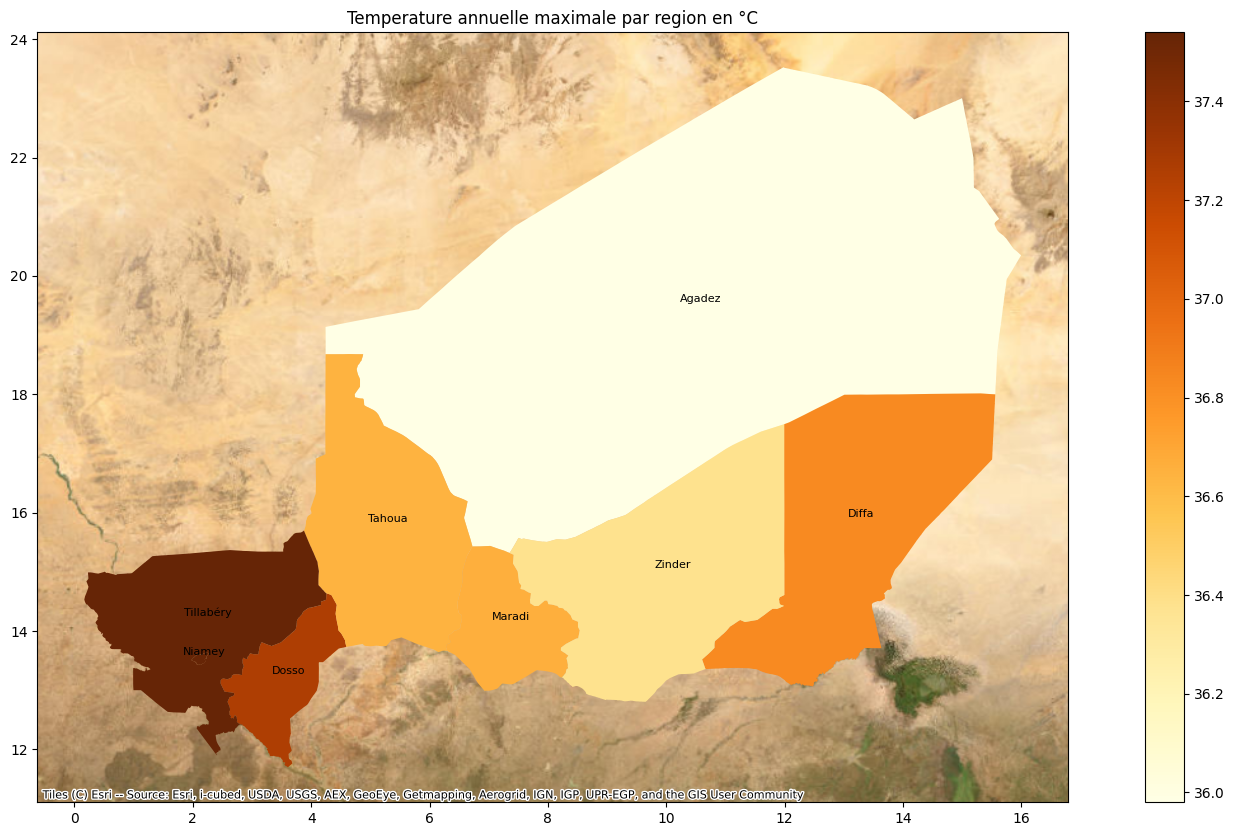

In [24]:
import matplotlib.pyplot as plt
import contextily as ctx
fig, ax = plt.subplots(figsize=(20, 10))
ax = niger_all_data.plot(column='Annual high temperature', cmap='YlOrBr', ax=ax, legend=True)
ctx.add_basemap(ax,source=ctx.providers.Esri.WorldImagery,crs=niger_all_data.crs.to_string(), zoom=6)
for index, row in niger_all_data.iterrows():
    ax.annotate(row['Region'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3), textcoords='offset points', ha='center', fontsize=8, color='black')
plt.title('Temperature annuelle maximale par region en °C')
plt.show()


## Visualisations de la Temperature annuelle minimale par region en °C

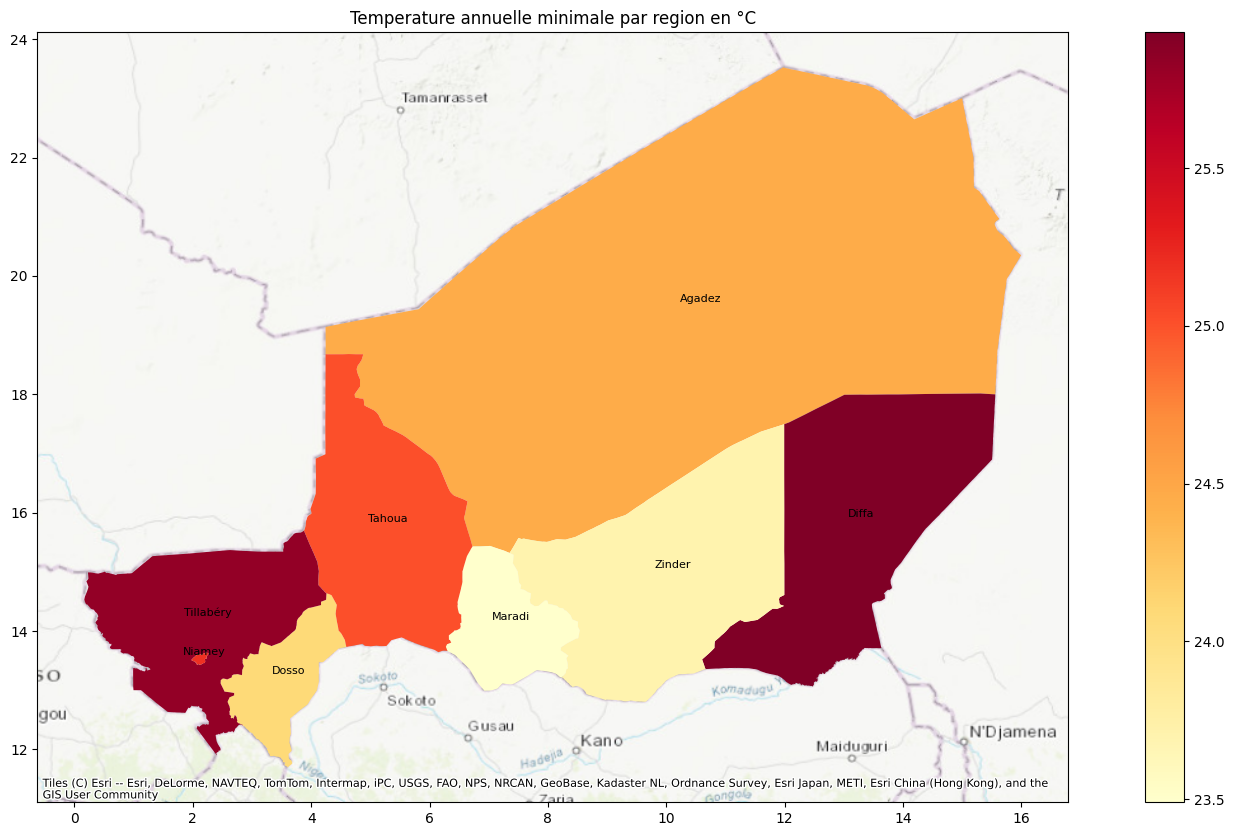

In [25]:
import matplotlib.pyplot as plt
import contextily as ctx
fig, ax = plt.subplots(figsize=(20, 10))
ax = niger_all_data.plot(column='Annual low temperature', cmap='YlOrRd', ax=ax, legend=True)
ctx.add_basemap(ax,source=ctx.providers.Esri.WorldTopoMap,crs=niger_all_data.crs.to_string(), zoom=6)
# Ajouter des étiquettes avec les noms des départements
for index, row in niger_all_data.iterrows():
    ax.annotate(row['Region'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3), textcoords='offset points', ha='center', fontsize=8, color='black')
plt.title('Temperature annuelle minimale par region en °C')
plt.show()

## Visualisations de la précipitation annuelle moyenne par region en mm

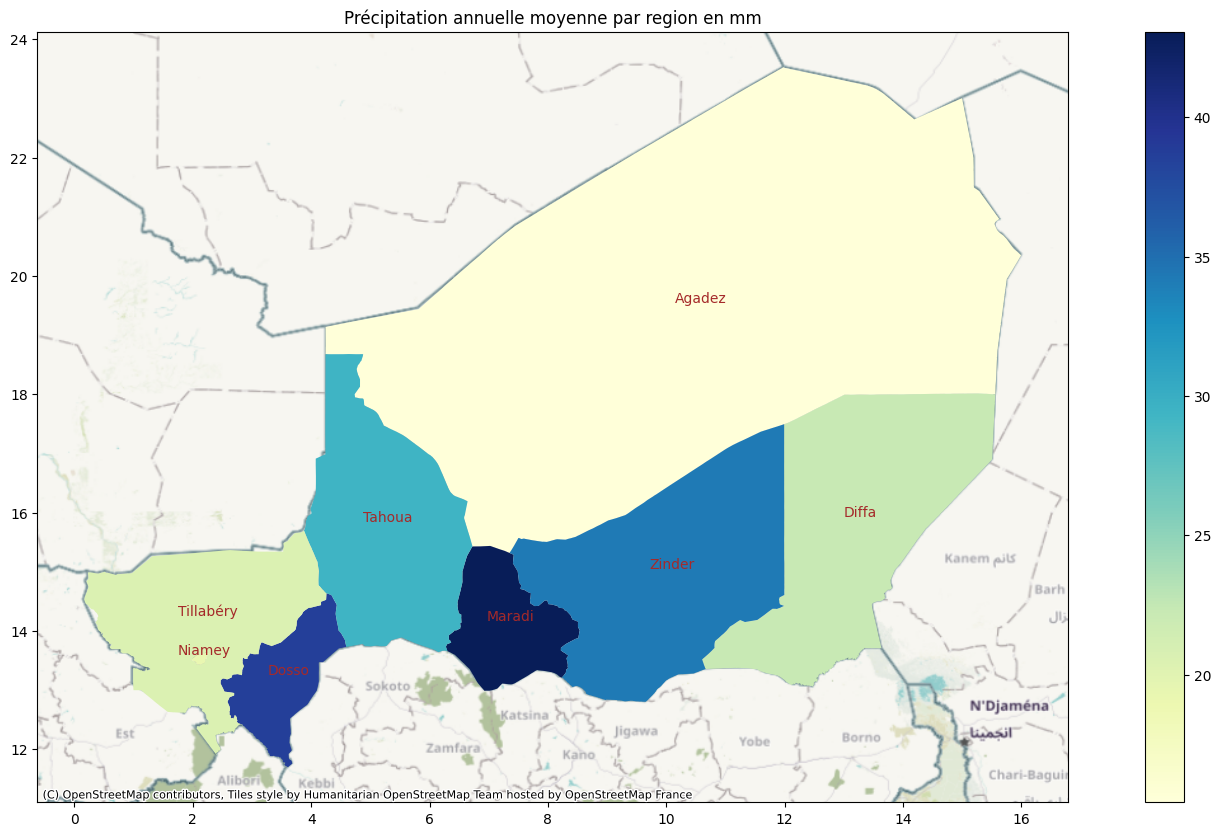

In [26]:
import matplotlib.pyplot as plt
import contextily as ctx
fig, ax = plt.subplots(figsize=(20, 10))
ax = niger_all_data.plot(column='Average annual precip.', cmap='YlGnBu', ax=ax, legend=True)
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.HOT,crs=niger_all_data.crs.to_string(), zoom=6)
# Ajouter des étiquettes avec les noms des départements
for index, row in niger_all_data.iterrows():
    ax.annotate(row['Region'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3), textcoords='offset points', ha='center', fontsize=10, color='brown')
plt.title('Précipitation annuelle moyenne par region en mm')
plt.show()

## Visualisation du nombre moyen des jours par region avec pluie ≥ 1 mm

In [27]:
bar_chart_temp_par_region = px.bar(niger_all_data,x=niger_all_data.Region,y=niger_all_data['Number of days with rainfall (≥ 1.0 mm)'],
                  color_discrete_sequence = ['#18D367']*len(niger_all_data['Number of days with rainfall (≥ 1.0 mm)']),template ='plotly_white')
bar_chart_temp_par_region.update_layout(title_text = "Nombre moyen des jours par region avec pluie ≥ 1 mm ",title_x = 0.5, showlegend = False)

## Visualisation du nombre moyen des jours par region sans pluie

In [28]:
bar_chart_temp_par_region = px.bar(niger_all_data,x=niger_all_data.Region,y=niger_all_data['Days with no rain'],
                  color_discrete_sequence = ['#D5300C']*len(niger_all_data['Days with no rain']),template ='plotly_white')
bar_chart_temp_par_region.update_layout(title_text = "Nombre moyen des jours par region sans pluie",title_x = 0.5, showlegend = False)

In [29]:
alti_humidite = niger_all_data[['Region','Humidity','Attitude/Elevation']]
alti_humidite

,Region,Humidity,Attitude/Elevation
0,Agadez,17.93,503.57
1,Diffa,26.00,307.83
2,Dosso,32.89,238.11
3,Maradi,28.14,361.33
4,Tahoua,23.42,388.55
5,Tillabéry,24.17,283.09
6,Zinder,24.05,470.16
7,Niamey,27.28,221.79


## Visualisations de l'humidité et de l'altitude par région

In [30]:
# Melt the DataFrame to combine 'Humidity' and 'Attitude/Elevation' into a single column
df_melted = pd.melt(alti_humidite, id_vars='Region', var_name='Variable', value_name='Values')

fig = px.bar(df_melted, x='Region', y='Values', color='Variable', barmode='group',
             labels={'Variable': 'Metrics'},template ='plotly_white')
fig.update_layout(title='Humidité et  Attitude/Elevation par région',xaxis_title='Region',yaxis_title='Values')

fig.show()